<a href="https://colab.research.google.com/github/indra-04/Machine_Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay # Import ConfusionMatrixDisplay

In [27]:
# Upload your dataset
uploaded = files.upload()

# After uploading, you can access the file by its name, for example 'your_dataset.csv'
# Make sure to replace 'your_dataset.csv' with your actual file name
filename = list(uploaded.keys())[0]

Saving iris.csv to iris (2).csv


In [13]:
# Load your dataset
# Replace with your actual dataset
df = pd.read_csv('iris.csv')


In [14]:
# Split the dataset into features (X) and target (y)
X = df.drop(columns=['Id', 'Species'])  # Assuming 'Species' is the categorical feature column
y = df['Species']  # Target variable (categorical)


In [16]:
# Encode categorical features and target
# Initialize encoders
label_encoder = LabelEncoder()
# onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for Decision Trees

# Fit and transform target variable
y_encoded = label_encoder.fit_transform(y)

# # Fit and transform categorical features (if any)
# X_encoded = onehot_encoder.fit_transform(X[['Species']])  # Replace 'Species' if you have other categorical features
# X = X.drop(columns=['Species'])  # Remove original categorical feature column
# X = pd.concat([X, pd.DataFrame(X_encoded)], axis=1)  # Concatenate encoded features


In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [20]:
# Create and train the KNN model
k = 3  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [28]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


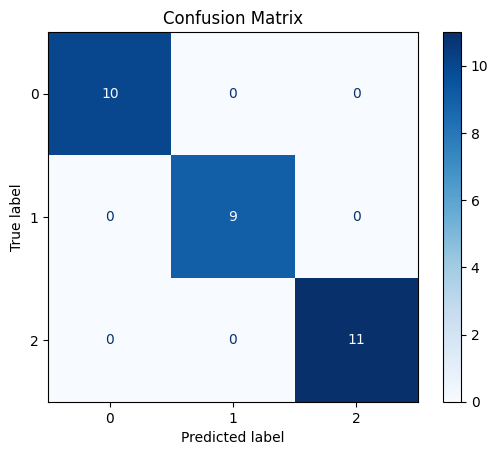

In [31]:
# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()